# Cookie Cats Retention Strategy

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv("Data.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
pd.isnull(user_df).sum()


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [4]:
pd.isna(user_df).sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

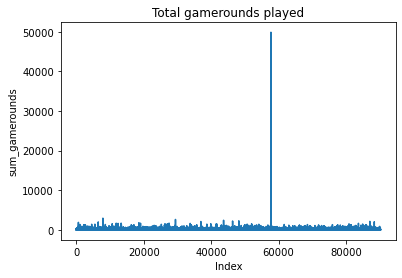

In [5]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [6]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
user_df.loc[user_df['sum_gamerounds'].idxmax()]


userid            6390605
version           gate_30
sum_gamerounds      49854
retention_1         False
retention_7          True
Name: 57702, dtype: object

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

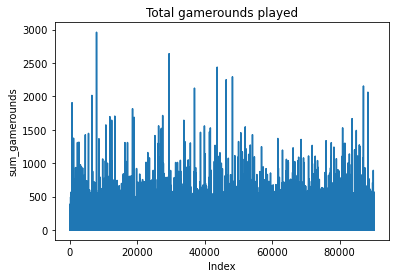

In [7]:
#Plot the graph for sum_gamerounds player after removing the outlier

df=user_df.drop([57702])

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(df.sum_gamerounds)

In [8]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [9]:
df3=df[df['retention_7'] == True]
df3

,userid,version,sum_gamerounds,retention_1,retention_7
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
10,1842,gate_40,3,False,True
14,2218,gate_30,305,True,True
...,...,...,...,...,...
90134,9991949,gate_30,191,True,True
90150,9995412,gate_40,253,True,True
90156,9996093,gate_40,23,False,True
90163,9996688,gate_30,83,True,True


In [10]:
len(df)
df.loc[df['sum_gamerounds'].idxmax()]

90188

userid             871500
version           gate_30
sum_gamerounds       2961
retention_1          True
retention_7          True
Name: 7912, dtype: object

## Plot summary statistics and identify trends to answer basis business questions

### What is the overall 7-day retention rate of the game?

In [11]:
#Insert calculation for 7-day retention rate

retention_rate_7= np.count_nonzero(df["retention_7"])/len(df["retention_7"])*100
print("Overal 7 days retention rate of the game for both versions is: ","%.2f"% retention_rate_7,"%")

print("Overal 7 days retention rate of the game for both versions is: " ,round(retention_rate_7,2),"%")

Overal 7 days retention rate of the game for both versions is:  18.61 %
Overal 7 days retention rate of the game for both versions is:  18.61 %


### How many players never played the game after installing? 

In [12]:
# Find number of customers with sum_gamerounds is equal to zero
never_play= len(df[df["sum_gamerounds"]==0])
print("No of players that never played the game after installing for both versions is: " ,never_play)

No of players that never played the game after installing for both versions is:  3994


### Does the number of users decrease as the level progresses highlighting the difficulty of the game?

sum_gamerounds       1
Count             5538
Name: 1, dtype: int64

Text(0.5, 1.0, 'Count of users against sum_gamerounds')

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'Count of users')

(0.0, 200.0, 0.0, 6000.0)

<BarContainer object of 941 artists>

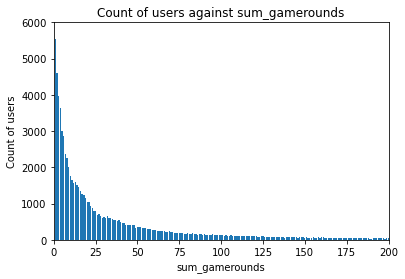

In [13]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

dfsg = df.groupby(by='sum_gamerounds')["userid"].count().reset_index() #groupby
dfsg.rename(columns={'userid':'Count'},inplace=True) #rename column name

#find the max count to scale y-axis
dfsg.loc[dfsg['Count'].idxmax()]

plt.title("Count of users against sum_gamerounds")
plt.xlabel("sum_gamerounds")
plt.ylabel("Count of users")
x=dfsg['sum_gamerounds']
y=dfsg['Count']
plt.axis([0,200,0,6000])
plt.bar(x, y)

## Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Seven days retention rate summary for different game versions

In [14]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)



retention_7,False,True
version,,
gate_30,0.809799,0.190201
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
The 7 days retention rate of both version is similar, with gate_30 retention rate slightly higher. Need to do hypothesis testing H0: gate_40 7 day retention rate >=gate_30
    H1: gate_40 7 day retention rate < gate_30

### Gamerounds summary for different game versions

In [15]:
#use pandas group by to calculate average game rounds played summarized by different versions
dfv = df.groupby(by='version')["sum_gamerounds"].mean().reset_index()
dfv


,version,sum_gamerounds
0,gate_30,51.342111
1,gate_40,51.298776


<mark>__Analsysis Results:__

The average number of game rounds played for each version only slightly differ. gate_30 version has slightly higher gamerounds average

## Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [16]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")

df["version"] = np.where(df.version == "gate_30", "A","B")
group_A=pd.DataFrame(df[df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(df[df.version=="B"]['sum_gamerounds'])




In [17]:
group_A

,sum_gamerounds
0,3
1,38
6,0
11,0
13,39
...,...
90179,14
90180,7
90182,21
90183,10


### Shapiro test of Normality

,sum_gamerounds
count,44699.000000
mean,51.342111
std,102.057598
min,0.000000
25%,5.000000
50%,17.000000
75%,50.000000
max,2961.000000


<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'group_A sum_gamerounds Hist')

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'No.of user')

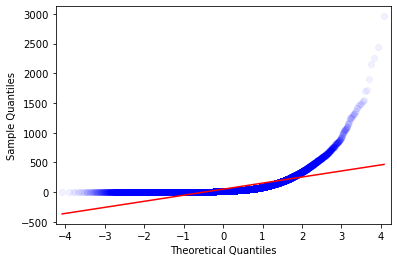

Statistics=0.489, p=0.000
Sample does not look Gaussian (reject H0)


,sum_gamerounds
count,45489.000000
mean,51.298776
std,103.294416
min,0.000000
25%,5.000000
50%,16.000000
75%,52.000000
max,2640.000000


<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'group_B sum_gamerounds Hist')

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'No.of user')

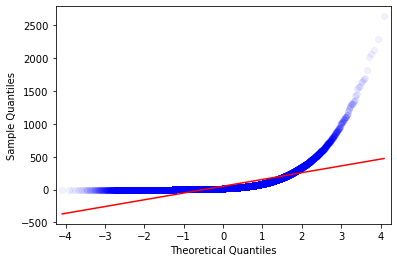

Statistics=0.483, p=0.000
Sample does not look Gaussian (reject H0)


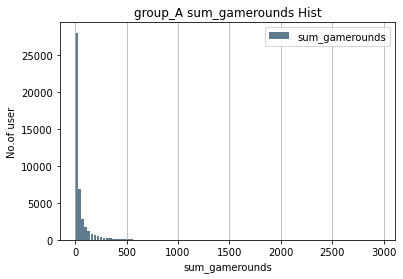

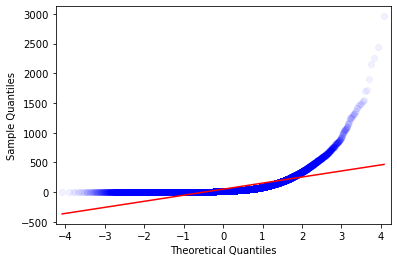

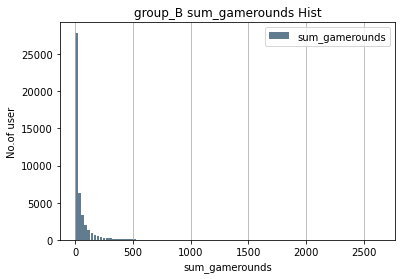

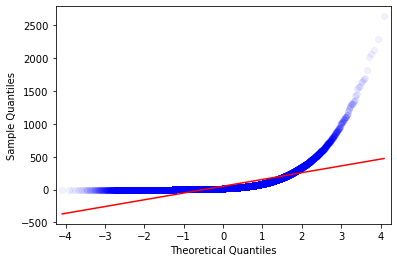

In [18]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    
from statsmodels.graphics.gofplots import qqplot
#test for group_A
group_A.describe()

#plot histogram
group_A.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('group_A sum_gamerounds Hist')
plt.xlabel('sum_gamerounds')
plt.ylabel('No.of user')
plt.grid(axis='y', alpha=0.1)

#qqplot
qqplot(group_A['sum_gamerounds'],line='s', alpha=0.05)

#shapiro test
stat_A, p_A = shapiro(group_A)
print('Statistics=%.3f, p=%.3f' % (stat_A, p_A))
#statement
alpha = 0.05
if p_A > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


#test for group_B
group_B.describe()

#plot histogram
group_B.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('group_B sum_gamerounds Hist')
plt.xlabel('sum_gamerounds')
plt.ylabel('No.of user')
plt.grid(axis='y', alpha=0.1)

#qqplot
qqplot(group_B['sum_gamerounds'], line='s',alpha=0.05)

#shapiro test
stat_B, p_B = shapiro(group_B)
print('Statistics=%.3f, p=%.3f' % (stat_B, p_B))
#statement
if p_B > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')




<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'group_A sum_gamerounds Hist')

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'No.of user')

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'group_B sum_gamerounds Hist')

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'No.of user')

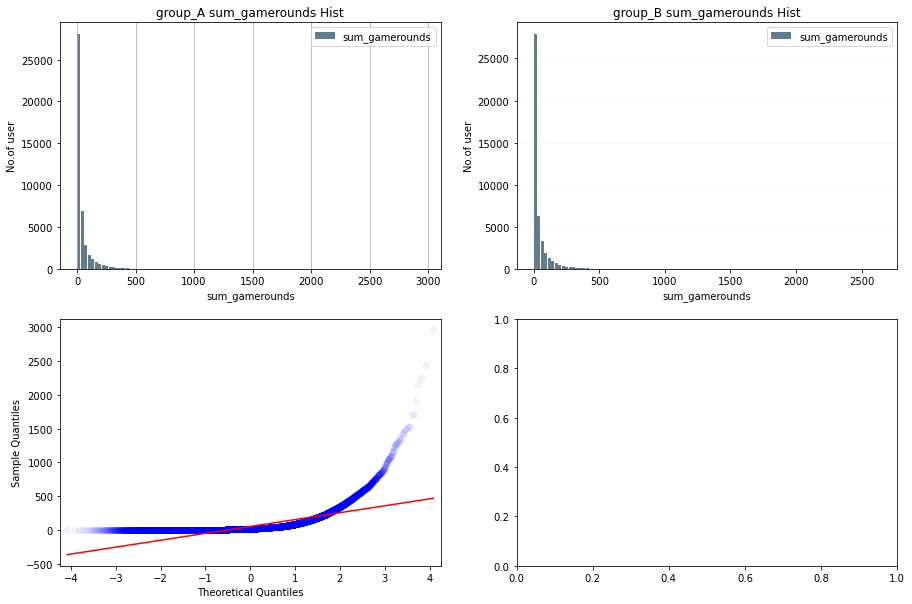

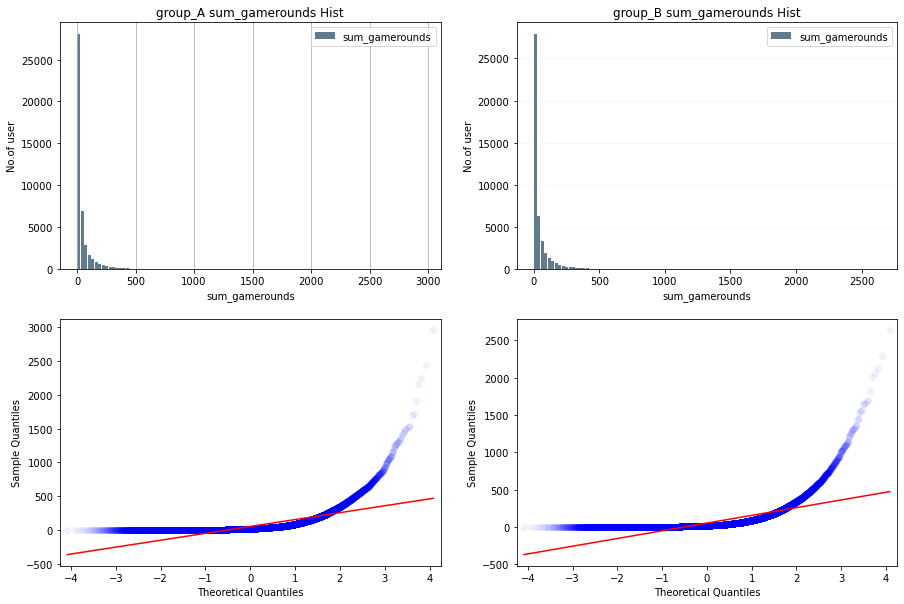

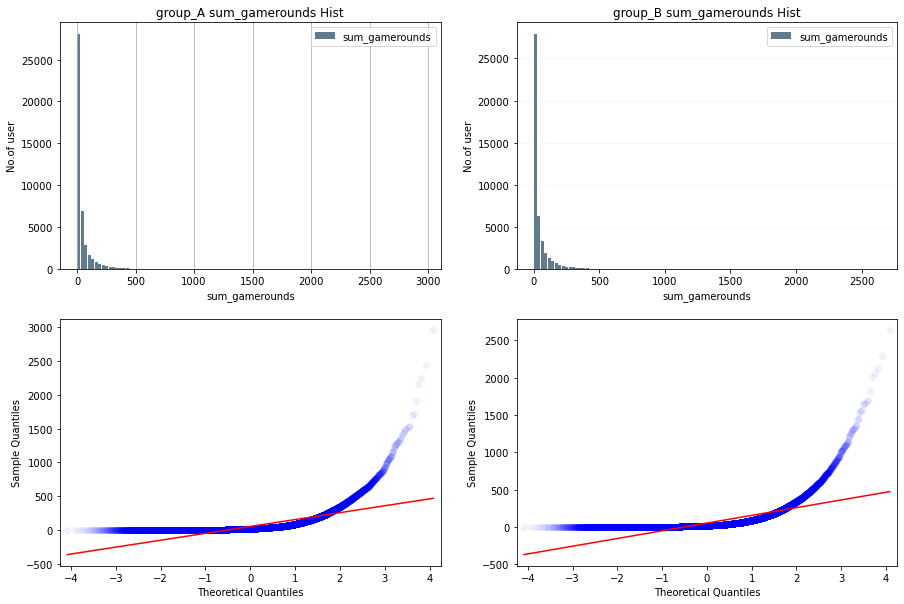

In [47]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='none',sharey='none',figsize = (15,10))

group_A.plot.hist(grid=True, ax=ax1, bins=100, rwidth=0.9, color='#607c8e')
ax1.set_title('group_A sum_gamerounds Hist')
ax1.set_xlabel('sum_gamerounds')
ax1.set_ylabel('No.of user')
ax1.grid(axis='y', alpha=0.1)

group_B.plot.hist(grid=True, ax=ax2, bins=100, rwidth=0.9, color='#607c8e')
ax2.set_title('group_B sum_gamerounds Hist')
ax2.set_xlabel('sum_gamerounds')
ax2.set_ylabel('No.of user')
ax2.grid(axis='y', alpha=0.1)

qqplot(group_A['sum_gamerounds'],line='s', alpha=0.05,ax=ax3)

qqplot(group_B['sum_gamerounds'],line='s',alpha=0.05,ax=ax4)




<mark>__Analsysis Results:__
    
Both group_A and group_B are NOT normally distributed, based on the histogram, QQ plot and shapiro test

### Test of homegienity of variance

In [21]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

from scipy.stats import levene
stat_lev, p_lev = levene(group_A['sum_gamerounds'],group_B['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat_lev, p_lev))
alpha = 0.05
if p_lev > alpha:
    print('Differences in variances is likely to have occured due to random sampling (fail to reject H0)')
else:
    print('Differences in variances is not likely to have occured due to random sampling (reject H0)')



Statistics=0.075, p=0.784
Differences in variances is likely to have occured due to random sampling (fail to reject H0)


<mark>__Analsysis Results:__
       
There is NOT enough information to show that the 2 groups have unequal variances. Hence, the two groups are considered to have equal variances.

### Test of significance: Two sample test

In [22]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Try Wilcoxon/Mann-Whitney U test using Ranksum function

from scipy.stats import ranksums
# by default, ranksums function assumes a two-tailed test 
stat_rs, p_rs = ranksums(group_A['sum_gamerounds'], group_B['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat_rs, p_rs))
alpha = 0.05
if p_rs > alpha:
    print('Differences in distribution is likely to have occured due to random sampling (fail to reject H0)')
else:
    print('Differences in distribution is not likely to have occured due to random sampling (reject H0)')



Statistics=1.952, p=0.051
Differences in distribution is likely to have occured due to random sampling (fail to reject H0)


In [23]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Try Wilcoxon/Mann-Whitney U test using mannwhitneyu function

from scipy.stats import mannwhitneyu
# by default, mannwhitneyu function assumes a one-tailed test (unlike what docs.scipy.org states)
stat_mwu, p_mwu = mannwhitneyu(group_A['sum_gamerounds'], group_B['sum_gamerounds'], alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat_mwu, p_mwu))
alpha = 0.05
if p_mwu > alpha:
    print('Differences in distribution is likely to have occured due to random sampling (fail to reject H0)')
else:
    print('Differences in distribution is not likely to have occured due to random sampling (reject H0)')



Statistics=1024285761.500, p=0.051
Differences in distribution is likely to have occured due to random sampling (fail to reject H0)


In [24]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: group_B (gate_40) is greater than group_A (gate_30)

#Apply relevant two sample test to accept or reject the NULL hypothesis
#Try Wilcoxon/Mann-Whitney U test using mannwhitneyu function for ONE-TAILED Test (group_B > group_A)

from scipy.stats import mannwhitneyu
# by default, mannwhitneyu function assumes a one-tailed test (unlike what docs.scipy.org states)
stat_mwu, p_mwu = mannwhitneyu(group_B['sum_gamerounds'], group_A['sum_gamerounds'], alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat_mwu, p_mwu))
alpha = 0.05
if p_mwu > alpha:
    print('Differences in distribution is likely to have occured due to random sampling (fail to reject H0)')
else:
    print('Differences in distribution is not likely to have occured due to random sampling (reject H0)')



Statistics=1009027049.500, p=0.975
Differences in distribution is likely to have occured due to random sampling (fail to reject H0)


In [25]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: group_A (gate_30) is greater than group_B (gate_40)

#Apply relevant two sample test to accept or reject the NULL hypothesis
#Try Wilcoxon/Mann-Whitney U test using mannwhitneyu function for ONE-TAILED Test (group_A > group_B)

from scipy.stats import mannwhitneyu
# by default, mannwhitneyu function assumes a one-tailed test (unlike what docs.scipy.org states)
stat_mwu, p_mwu = mannwhitneyu(group_A['sum_gamerounds'], group_B['sum_gamerounds'], alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat_mwu, p_mwu))
alpha = 0.05
if p_mwu > alpha:
    print('Differences in distribution is likely to have occured due to random sampling (fail to reject H0)')
else:
    print('Differences in distribution is not likely to have occured due to random sampling (reject H0)')



Statistics=1024285761.500, p=0.025
Differences in distribution is not likely to have occured due to random sampling (reject H0)


<mark>__Analsysis Results:__
       
The tests (both one-tailed and two-tailed) shows that there is not enough information to reject the H0 (NULL Hypothesis) and there is no significant evidence that moving the gate from level 30 to 40 improves the retention rate/increases the sum_gamerounds. Hence, the two samples, group_A (gate_30) and group_B (gate_40), can be considered equal.

In fact, testing alternative hypothesis (H1) that group_A (gate_30) is greater than group_B (gate_40) shows a p-value of 0.025 which is enough to accept the H1 that the sum_gamerounds in group_A (gate_30) is greater than group_B (gate_40).

## Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [26]:
dfrth = df.groupby(by='version')[["retention_1","retention_7"]].sum(["retention_1"]=="TRUE",["retention_7"]=="TRUE")
dfrth

,retention_1,retention_7
version,,
A,20034,8501
B,20119,8279


In [119]:
#this is the roundabout way to get the  percentage
dfrt = df.groupby(by='version')["userid","retention_1","retention_7"].agg({"retention_1": sum,"retention_7":sum, "userid":"count"})

dfc = dfrt.iloc[:,2:3]

dfc['1']=dfrt.iloc[:,2:3]
dfrtl = dfrt.drop(columns=['userid'])
dfrtl.reset_index(drop=True)
dfc.reset_index(drop=True)
dfc.columns=['retention_1','retention_7']
dfrtl.index=dfc.index
dfrtl
dfc
#dfrtp=dfrtl.reset_index(drop=True)/dfc.reset_index(drop=True) 
dfrtp=dfrtl/dfc

dfrtp

,retention_1,retention_7
0,20034,8501
1,20119,8279


,userid,1
0,44699,44699
1,45489,45489


,retention_1,retention_7
version,,
A,20034,8501
B,20119,8279


,retention_1,retention_7
version,,
A,44699,44699
B,45489,45489


,retention_1,retention_7
version,,
A,0.448198,0.190183
B,0.442283,0.182000


<mark>__Analsysis Results:__
    
Looking at the crosstab above, group A has a slightly higher retention_1 and retention_7 rate. 
which supports the one-tailed significance test results where testing alternative hypothesis (H1) that group_A (gate_30) is greater than group_B (gate_40) shows a p-value of 0.025 which is enough to accept the H1 that the sum_gamerounds in group_A (gate_30) is greater than group_B (gate_40).
    
Maintaining current status quo with gate at level 30 may be the best option as there is no reason to spend the resources to change the gate level.

## Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [33]:
#sample grouping
group_A_1=pd.DataFrame(df[df.version=="A"]['retention_1'])
group_B_1=pd.DataFrame(df[df.version=="B"]['retention_1'])
group_A_7=pd.DataFrame(df[df.version=="A"]['retention_7'])
group_B_7=pd.DataFrame(df[df.version=="B"]['retention_7'])

In [84]:
#test
group_A_1

,retention_1
0,False
1,True
6,False
11,False
13,True
...,...
90179,True
90180,False
90182,True
90183,False


In [148]:
#test if the value make sense
rr= np.count_nonzero(group_A_7["retention_7"])/len(group_A_7["retention_7"])*100
rr

19.018322557551624

In [89]:
#Hint: Plot density function
# scikit-learn bootstrap
#bootstrap sampling of size 40000, 1000 times for 1 day retention
from sklearn.utils import resample
import random
# prepare bootstrap sample
boot_a_1 = []
boot_b_1 = []
# Bootstrap Sampling
for i in range(1000):
  a = random.sample(group_A_1['retention_1'].tolist(), 40000)
  b = random.sample(group_B_1['retention_1'].tolist(), 40000)
  rate_a = np.count_nonzero(a)/len(a)
  rate_b = np.count_nonzero(b)/len(b)
  boot_a_1.append(rate_a)
  boot_b_1.append(rate_b)
  

#    boot = resample(group_A['sum_gamerounds'], replace=True, n_samples=45000, random_state=1)
#    print('Bootstrap Sample: %s' % boot)
    
# out of bag observations
#oob = [x for x in group_A['sum_gamerounds'] if x not in boot]
#print('OOB Sample: %s' % oob)


In [91]:
#Hint: Plot density function
# scikit-learn bootstrap
#bootstrap sampling of size 40000, 1000 times for 7 day retention
from sklearn.utils import resample
import random
# prepare bootstrap sample
boot_a_7 = []
boot_b_7 = []
# Bootstrap Sampling
for i in range(1000):
  a = random.sample(group_A_7['retention_7'].tolist(), 40000)
  b = random.sample(group_B_7['retention_7'].tolist(), 40000)
  rate_a = np.count_nonzero(a)/len(a)
  rate_b = np.count_nonzero(b)/len(b)
  boot_a_7.append(rate_a)
  boot_b_7.append(rate_b)
  

#    boot = resample(group_A['sum_gamerounds'], replace=True, n_samples=45000, random_state=1)
#    print('Bootstrap Sample: %s' % boot)
    
# out of bag observations
#oob = [x for x in group_A['sum_gamerounds'] if x not in boot]
#print('OOB Sample: %s' % oob)

In [92]:
#test
boot_a_7

[0.19085,
 0.190675,
 0.19145,
 0.190475,
 0.1893,
 0.19015,
 0.190475,
 0.1893,
 0.1906,
 0.190325,
 0.19065,
 0.1902,
 0.190375,
 0.190625,
 0.190575,
 0.18985,
 0.18955,
 0.18895,
 0.1895,
 0.18975,
 0.189675,
 0.18925,
 0.189875,
 0.19,
 0.19035,
 0.1896,
 0.1901,
 0.189325,
 0.190125,
 0.18945,
 0.1905,
 0.191275,
 0.19005,
 0.19025,
 0.190675,
 0.190825,
 0.189775,
 0.191075,
 0.1899,
 0.18915,
 0.190725,
 0.18985,
 0.188925,
 0.19015,
 0.1903,
 0.191325,
 0.189325,
 0.1911,
 0.190075,
 0.191,
 0.1907,
 0.18905,
 0.19005,
 0.1887,
 0.188975,
 0.1904,
 0.190875,
 0.19025,
 0.191175,
 0.1898,
 0.189575,
 0.190675,
 0.18925,
 0.1915,
 0.18985,
 0.190075,
 0.190325,
 0.189725,
 0.19005,
 0.189475,
 0.190125,
 0.190075,
 0.18955,
 0.189975,
 0.189575,
 0.19095,
 0.190275,
 0.1905,
 0.190375,
 0.1902,
 0.1887,
 0.1897,
 0.189725,
 0.190725,
 0.1892,
 0.1902,
 0.190275,
 0.189275,
 0.190175,
 0.189825,
 0.18975,
 0.190625,
 0.18895,
 0.191075,
 0.190575,
 0.19075,
 0.19035,
 0.191175,
 

In [146]:
#converting list to panda dataframe
boot_a_1=pd.DataFrame(boot_a_1)
boot_a_7=pd.DataFrame(boot_a_7)
boot_b_1=pd.DataFrame(boot_b_1)
boot_b_7=pd.DataFrame(boot_b_7)

boot_a_1.columns=["gate_30"]
boot_a_7.columns=["gate_40"]
boot_b_1.columns=["gate_30"]
boot_b_7.columns=["gate_40"]

In [145]:
#test
boot_a_1

,gate_30
0,0.448100
1,0.449450
2,0.447625
3,0.447950
4,0.447950
...,...
995,0.448075
996,0.448550
997,0.447825
998,0.448000


<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'retention rate')

Text(0, 0.5, 'number of sample')

Text(0.5, 1.0, '1 day retention rate distribution')

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'retention rate')

Text(0.5, 1.0, '7 days retention rate distribution')

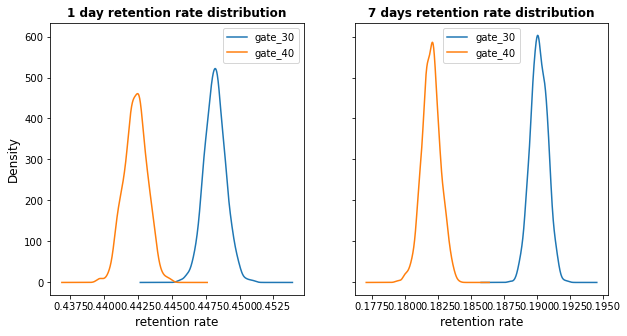

In [147]:
# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2,sharey=True,figsize = (10,5))

boot_a_1.plot.kde(ax=ax1)
ax1.set_xlabel("retention rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold")

boot_b_1.plot.kde(ax=ax1).legend(['gate_30','gate_40'])


boot_a_7.plot.kde(ax=ax2)
ax2.set_xlabel("retention rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold")

boot_b_7.plot.kde(ax=ax2).legend(['gate_30','gate_40'])

plt.show()


__Analysis:__ Using bootstrap resampling, the effect of outliers are minimised and it is now clearly shown that gate_30 group has higher retention rate than gate_40 group at both 1 day and 7 day which agrees with the one-tailed significance testing results.